In [1]:
import uproot
import awkward as ak
from multiprocessing import Pool, cpu_count
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import ROOT

Welcome to JupyROOT 6.28/04


In [6]:
file = uproot.open('run_01.root')
tree = uproot.open('run_01.root:Delphes')

In [7]:
tree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Event                | int32_t                  | AsDtype('>i4')
Event/Event.fUniq... | uint32_t[]               | AsJagged(AsDtype('>u4'))
Event/Event.fBits    | uint32_t[]               | AsJagged(AsDtype('>u4'))
Event/Event.Number   | int64_t[]                | AsJagged(AsDtype('>i8'))
Event/Event.ReadTime | float[]                  | AsJagged(AsDtype('>f4'))
Event/Event.ProcTime | float[]                  | AsJagged(AsDtype('>f4'))
Event/Event.Proce... | int32_t[]                | AsJagged(AsDtype('>i4'))
Event/Event.MPI      | int32_t[]                | AsJagged(AsDtype('>i4'))
Event/Event.Weight   | float[]                  | AsJagged(AsDtype('>f4'))
Event/Event.Cross... | float[]                  | AsJagged(AsDtype('>f4'))
Event/Event.Cross... | float[]                  | AsJagged(AsDtype('>f4'))
Event/Event.Scale    | 

In [8]:
#jets = tree.arrays(['Jet.PT','Jet.Eta','Jet.Phi'],'(Jet_size == 3 )',library='pd')
# Método para crear un nuevo array. alises aplico una función y le asigno un nombre a dicha campo
jets = tree.arrays(['Jet_size','Jet.PT','Jet.Eta','Jet.Phi','Jet.DeltaR','Particle.PT','Particle.Eta','Particle.Phi'],aliases={'Jet.DeltaR': 'sqrt(Jet.DeltaEta**2 + Jet.DeltaPhi**2)'},library='ak')
jets

<Array [{Jet_size: 1, 'Jet.PT': ..., ...}, ...] type='50000 * {Jet_size: in...'>

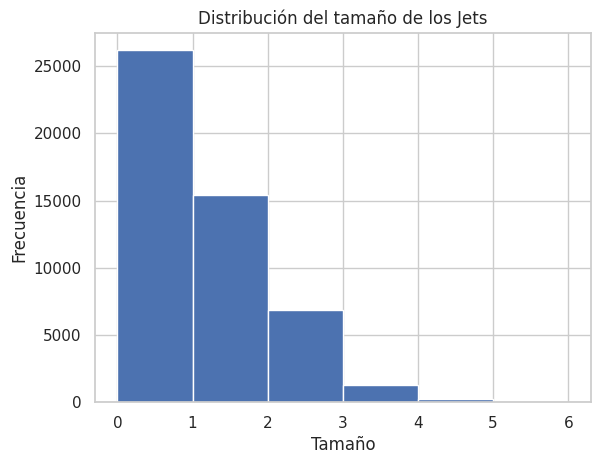

In [47]:
plt.hist(jets['Jet_size'],bins=[0,1,2,3,4,5,6])
plt.title('Distribución del tamaño de los Jets')
plt.xlabel('Tamaño')
plt.ylabel('Frecuencia')
plt.show()

In [20]:
# Crear un array de booleanos donde la condición es verdadera
mask = (jets["Jet_size"] == 2) 
# Aplicar la máscara al Awkward Array para filtrar los datos
jetsrfilt = jets[mask]
# Aplanar el array para eliminar las entradas 'False' de la máscara
jetsrfilt

<Array [{Jet_size: 2, 'Jet.PT': ..., ...}, ...] type='6841 * {Jet_size: int...'>

______________________


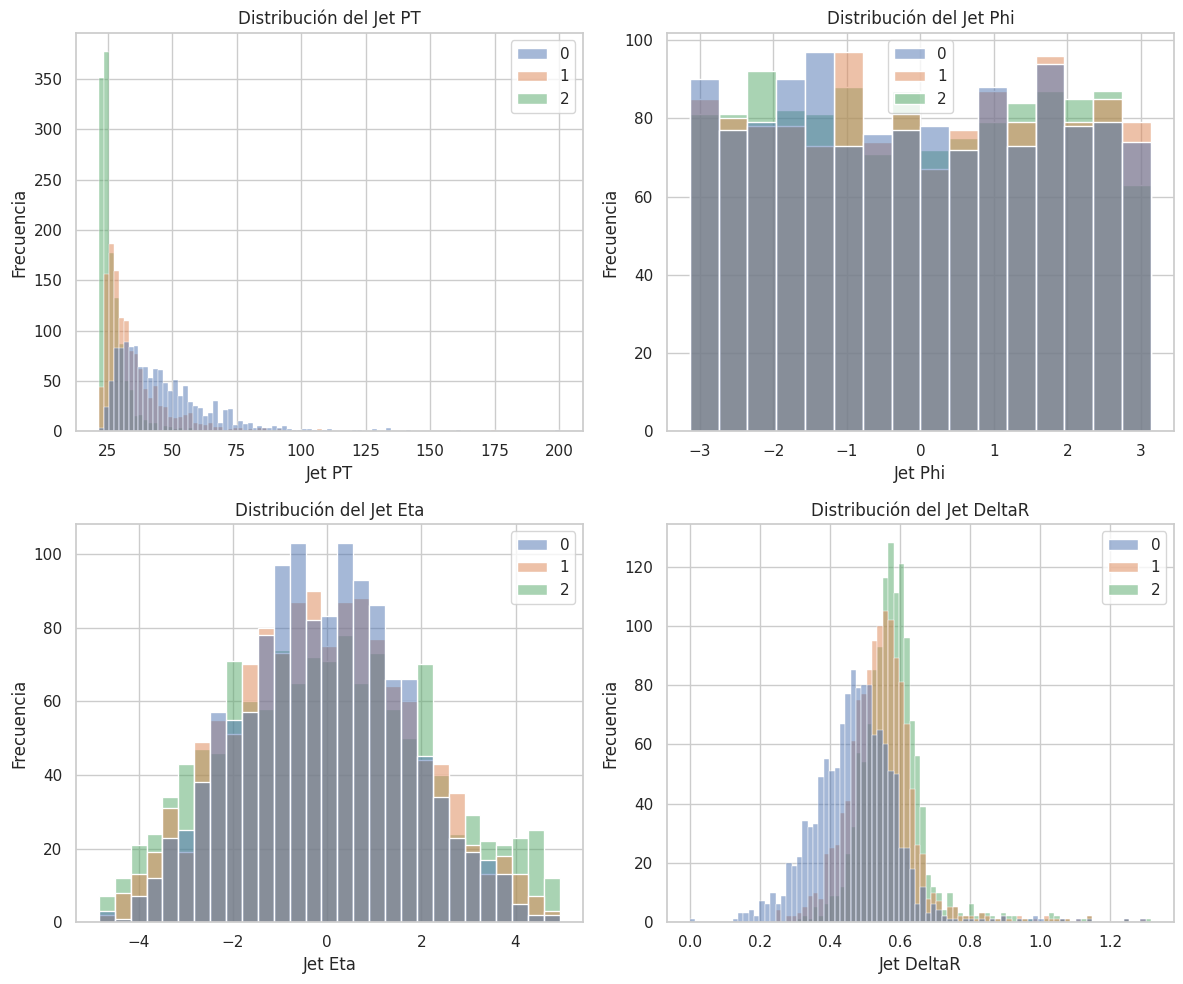

In [38]:
# Establecer el estilo de los gráficos
sns.set_theme(style="whitegrid")

# Configuración de la paleta de colores
palette = sns.color_palette('bright')

# Crear una cuadrícula de subgráficos 2x2
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Histograma para Jet.PT
sns.histplot(jetsrfilt['Jet.PT'], ax=axes[0, 0], color=palette[0])
axes[0, 0].set_title('Distribución del Jet PT')
axes[0, 0].set_xlabel('Jet PT')
axes[0, 0].set_ylabel('Frecuencia')

# Histograma para Jet.Phi
sns.histplot(jetsrfilt['Jet.Phi'], ax=axes[0, 1], color=palette[1])
axes[0, 1].set_title('Distribución del Jet Phi')
axes[0, 1].set_xlabel('Jet Phi')
axes[0, 1].set_ylabel('Frecuencia')

# Histograma para Jet.Eta
sns.histplot(jetsrfilt['Jet.Eta'], ax=axes[1, 0], color=palette[2])
axes[1, 0].set_title('Distribución del Jet Eta')
axes[1, 0].set_xlabel('Jet Eta')
axes[1, 0].set_ylabel('Frecuencia')

# Histograma para Jet.DeltaR
sns.histplot(jetsrfilt['Jet.DeltaR'], ax=axes[1, 1], color=palette[3])
axes[1, 1].set_title('Distribución del Jet DeltaR')
axes[1, 1].set_xlabel('Jet DeltaR')
axes[1, 1].set_ylabel('Frecuencia')

# Ajustar el layout para evitar la superposición de títulos y etiquetas
plt.tight_layout()

# Mostrar la figura completa
plt.show()


In [170]:
def calculate_deltaR(x):
    particle_eta = ak.broadcast_arrays(x['Particle.Eta'][:, :2], x['Jet.Eta'])[0]
    particle_phi = ak.broadcast_arrays(x['Particle.Phi'][:, :2], x['Jet.Phi'])[0]
    
    deltaEta = x['Jet.Eta'] - particle_eta
    deltaPhi = x['Jet.Phi'] - particle_phi
    deltaPhi = (deltaPhi + np.pi) % (2 * np.pi) - np.pi
    deltaR = np.sqrt(deltaEta ** 2 + deltaPhi ** 2)
    return deltaR

print(calculate_deltaR(jetsrfilt))
deltaR = calculate_deltaR(jetsrfilt)

[[1e+03, 2.16], [1e+03, 1e+03], [...], ..., [1e+03, 1e+03], [1e+03, 1e+03]]


In [171]:
deltaR

<Array [[1e+03, 2.16], [...], ..., [1e+03, 1e+03]] type='6841 * var * float32'>

In [41]:
jetsrfilt['Jet.DeltaR']

<Array [[0.433, 0.605], [...], ..., [0.584, 0.584]] type='6841 * var * float32'>